<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Encoding-categorical-data" data-toc-modified-id="Encoding-categorical-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Encoding categorical data</a></span></li><li><span><a href="#Data-Splitting" data-toc-modified-id="Data-Splitting-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Splitting</a></span></li><li><span><a href="#Feature-Scaling" data-toc-modified-id="Feature-Scaling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature Scaling</a></span></li><li><span><a href="#Part-2:-Make-the-ANN" data-toc-modified-id="Part-2:-Make-the-ANN-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Part 2: Make the ANN</a></span></li><li><span><a href="#Predicting" data-toc-modified-id="Predicting-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Predicting</a></span></li><li><span><a href="#Confusion-matrix" data-toc-modified-id="Confusion-matrix-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Confusion matrix</a></span></li><li><span><a href="#Homework:-Predict-Single-Sample" data-toc-modified-id="Homework:-Predict-Single-Sample-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Homework: Predict Single Sample</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import Image, display

In [2]:
df = pd.read_csv('../data/csv/Churn_Modelling.csv')
X = df.iloc[:,3:-1].values
y = df.iloc[:, -1].values

print(df.shape)
print(X[0])
print(y[0])
df.head()

(10000, 14)
[619 'France' 'Female' 42 2 0.0 1 1 1 101348.88]
1


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Encoding categorical data

In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer


le_geo = LabelEncoder()
X[:, 1] = le_geo.fit_transform(X[:, 1])

le_gen = LabelEncoder()
X[:, 2] = le_gen.fit_transform(X[:, 2])

ohe = OneHotEncoder(categories='auto')
X = ohe.fit_transform(X).toarray()
X = X[:, 1:] # do not take first dummy variable

print(X.shape)
print(X[0])
df2 = pd.DataFrame(X)

display(df.iloc[:,3:-1].head(20), df2.head(20))
# we can see france is 0,0  and female is 0 categorical features.

(10000, 16935)
[0. 1. 0. ... 0. 0. 0.]


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71
6,822,France,Male,50,7,0.00,2,1,1,10062.80
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88
8,501,France,Male,44,4,142051.07,2,0,1,74940.50
9,684,France,Male,27,2,134603.88,1,1,1,71725.73


,0,1,2,3,4,5,6,7,8,9,...,16925,16926,16927,16928,16929,16930,16931,16932,16933,16934
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Splitting

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape

(8000, 11)

# Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Part 2: Make the ANN

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [7]:
# Initializing the ANN
clf = Sequential()

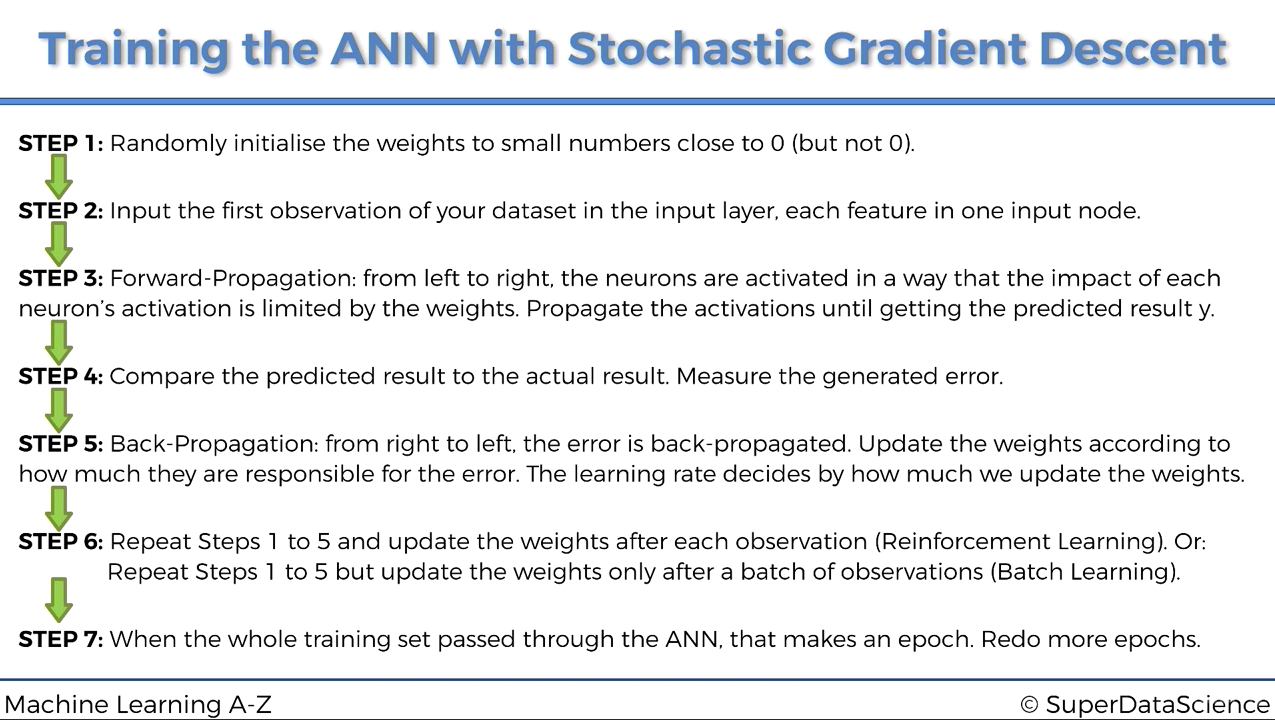

In [8]:
Image('../images/training_ann.png')

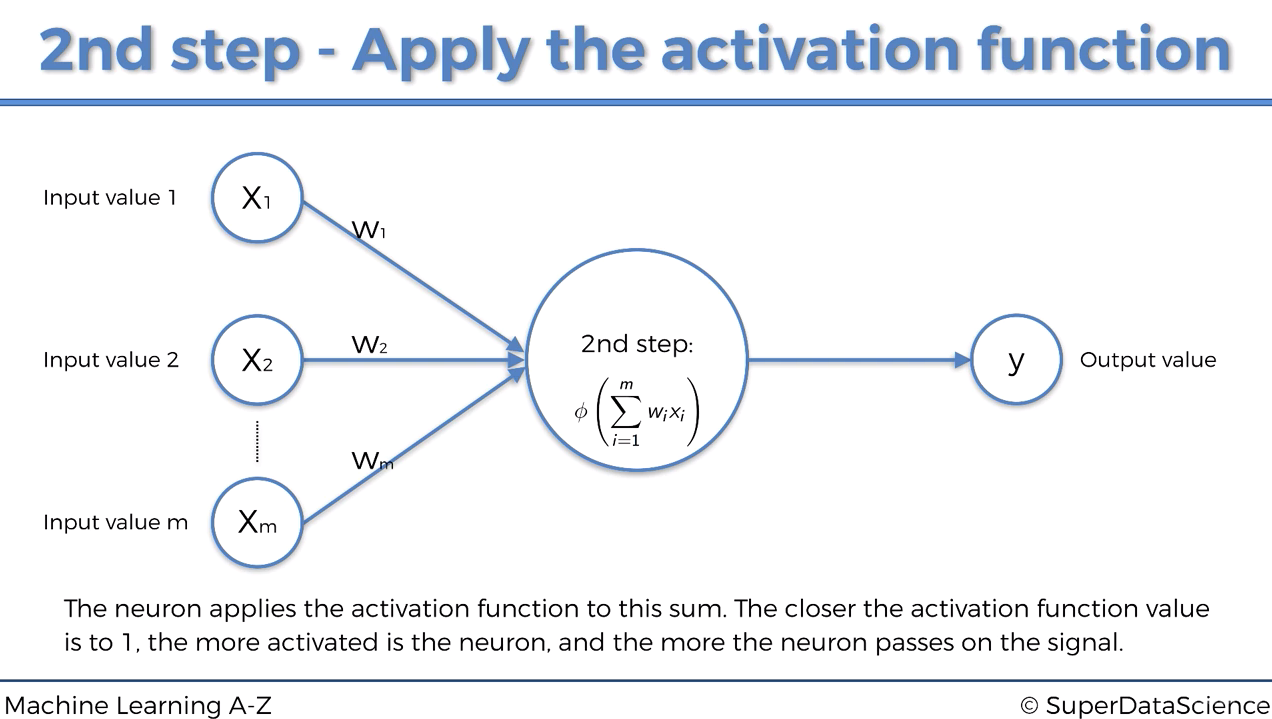

In [9]:
Image('../images/L20_apply_activation_funtion.png')

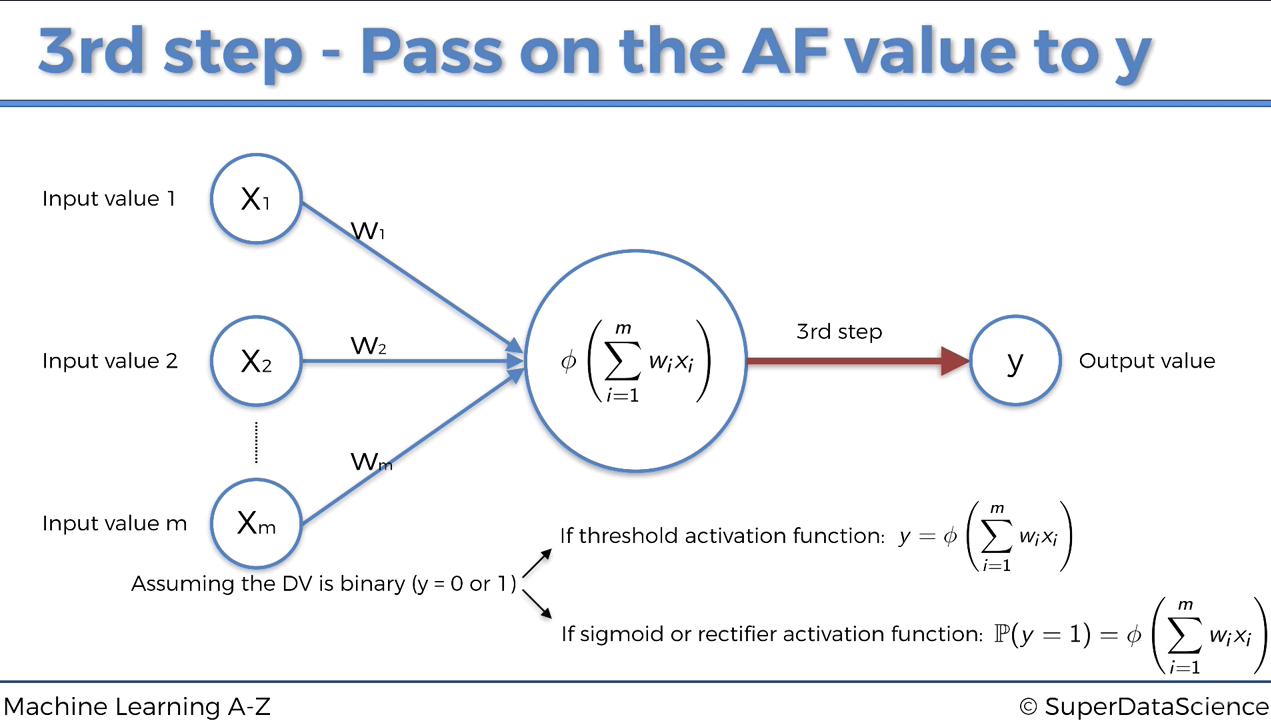

In [10]:
Image('../images/L20_pass_activation_function_to_y.png')

In [11]:
# Adding the input layer and the first hidden layer
# note: number of layers = (num of input + numbers of outputs)/2
clf.add(Dense(units=6, kernel_initializer='uniform', activation='relu',input_dim=11))

In [12]:
# add hidden layer
clf.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

In [13]:
# adding output layer
clf.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

In [14]:
clf.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
clf.fit(X_train,y_train, batch_size=10, epochs=100)

Epoch 1/100
8000/8000 [==============================] - 1s 93us/step - loss: 0.4004 - acc: 0.8337
Epoch 2/100
8000/8000 [==============================] - 1s 90us/step - loss: 0.4013 - acc: 0.8351
Epoch 3/100
8000/8000 [==============================] - 1s 89us/step - loss: 0.4007 - acc: 0.8361: 0s - loss: 0.3966 - acc
Epoch 4/100
8000/8000 [==============================] - 1s 92us/step - loss: 0.4010 - acc: 0.8339
Epoch 5/100
8000/8000 [==============================] - 1s 89us/step - loss: 0.4012 - acc: 0.8356
Epoch 6/100
8000/8000 [==============================] - 1s 87us/step - loss: 0.4011 - acc: 0.8341
Epoch 7/100
8000/8000 [==============================] - 1s 88us/step - loss: 0.4007 - acc: 0.8344
Epoch 8/100
8000/8000 [==============================] - 1s 95us/step - loss: 0.4011 - acc: 0.8347
Epoch 9/100
8000/8000 [==============================] - 1s 85us/step - loss: 0.4011 - acc: 0.8341
Epoch 10/100
8000/8000 [==============================] - 1s 90us/step - loss: 0.401

8000/8000 [==============================] - 1s 100us/step - loss: 0.4005 - acc: 0.8351
Epoch 83/100
8000/8000 [==============================] - 1s 99us/step - loss: 0.4000 - acc: 0.8355
Epoch 84/100
8000/8000 [==============================] - 1s 100us/step - loss: 0.3997 - acc: 0.8347
Epoch 85/100
8000/8000 [==============================] - 1s 93us/step - loss: 0.4002 - acc: 0.8354
Epoch 86/100
8000/8000 [==============================] - 1s 87us/step - loss: 0.3997 - acc: 0.8344
Epoch 87/100
8000/8000 [==============================] - 1s 92us/step - loss: 0.4002 - acc: 0.8346
Epoch 88/100
8000/8000 [==============================] - 1s 99us/step - loss: 0.4005 - acc: 0.8345
Epoch 89/100
8000/8000 [==============================] - 1s 97us/step - loss: 0.3998 - acc: 0.8344
Epoch 90/100
8000/8000 [==============================] - 1s 106us/step - loss: 0.3993 - acc: 0.8347
Epoch 91/100
8000/8000 [==============================] - 1s 97us/step - loss: 0.4003 - acc: 0.8331: 0s - loss

# Predicting

In [21]:
y_pred = clf.predict(X_test)
y_pred = (y_pred > 0.5)

# Confusion matrix

In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[1542,   53],
       [ 260,  145]])

In [23]:
acc = (cm[0,0] + cm[1,1]) / np.sum(cm.flatten())
acc

0.8435

# Homework: Predict Single Sample

In [19]:
# given data
new_pred = np.array([['France',600,'Male',40,3,60000,2,1,1,50e3]])

# from given model, frane is encoded as (0,0) and female is encoded as 0.
new_pred = np.array([[0,0,600,1,40,3,60000,2,1,1,50e3]])

# standardize
new_pred = sc.transform(new_pred)

# predict
y_pred = clf.predict(new_pred)
y_pred = (y_pred > 0.5)

y_pred

# we dont have the real answer to this data
# our model says y_pred is false, means customer will not leave the bank.

array([[False]])